# Mohit Yadav
## yadav171@umn.edu
## CSCI 5541 HW1

In [1]:
## Importing packages.
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sentencepiece as spm

import torchtext
torchtext.disable_torchtext_deprecation_warning()

In [2]:
## Set device to Cuda if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
## Download IMDB data.
from torchtext.datasets import IMDB

train_iter, test_iter = IMDB(split=('train', 'test'))

/Users/saturn/miniforge3/envs/nlp/lib/python3.12/site-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()


We see a lot of html in the text, and there are symbols which don't have meaning for our work. So we will need to clean the data before using.

In [4]:
## Convert the data to a pandas df for easy processing.
train_df = pd.DataFrame(train_iter, columns=['label', 'text'])
test_df = pd.DataFrame(test_iter, columns=['label', 'text'])

Visualize the data.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25000 non-null  int64 
 1   text    25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25000 non-null  int64 
 1   text    25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
## See the text stored in the dataframe.
print(train_df['text'][0])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

There are a lot of symbols and html text in the sample that needs to be removed.

In [8]:
#Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
/var/folders/1l/q74c92gx3gzf6b0b5lsr2n0m0000gn/T/ipykernel_99653/256755324.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/1l/q74c92gx3gzf6b0b5lsr2n0m0000gn/T/ipykernel_99653/256755324.py:7: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/1l/q74c92gx3gzf6b0b5lsr2n0m0000gn/T/ipykernel_99653/256755324.py:11: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [9]:
## Clean the text and store in a txt file for training the tokenizer.
with open("cleaned_text.txt", "w") as f:
    for label, text in train_iter:
        f.write(clean_text(text).strip() + "\n")

In [10]:
### BPE Tokenization.
## Create spm model with our data and vocab size of 8000.
VOCAB_SIZE = 8000
spm.SentencePieceTrainer.train(input='./cleaned_text.txt', model_prefix='bpe_model', vocab_size=VOCAB_SIZE, model_type='bpe')

sp = spm.SentencePieceProcessor(model_file='bpe_model.model')

## Tokenization functions.
def tokenize_into_str(text):
    return " ".join(sp.encode(text, out_type=str))

def tokenize_into_idx(text):
    return " ".join([str(tok) for tok in sp.encode(text)])

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: ./cleaned_text.txt
  input_format: 
  model_prefix: bpe_model
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  di

In [11]:
## Add cleaned text to dataframes.
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
train_df['tokenized_text'] = train_df['cleaned_text'].apply(tokenize_into_str)
train_df['tokenized_idx'] = train_df['cleaned_text'].apply(tokenize_into_idx)

test_df['cleaned_text'] = test_df['text'].apply(clean_text)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(tokenize_into_str)
test_df['tokenized_idx'] = test_df['cleaned_text'].apply(tokenize_into_idx)

el_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=1422 min_freq=248
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1392 size=1320 all=71733 active=4168 piece=▁rid
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1367 size=1340 all=72362 active=4797 piece=▁desp
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1332 size=1360 all=73150 active=5585 piece=line
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1306 size=1380 all=73722 active=6157 piece=body
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1280 size=1400 all=74563 active=6998 piece=▁sou
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=1279 min_freq=226
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1253 size=1420 all=75085 active=4234 piece=▁et
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1225 size=1440 all=75902 active=5051 piece=▁throughout
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1202 size=1460 all=76582 active=5731 piece=▁pat
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=1169 siz

20 all=114344 active=6006 piece=▁ii
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=404 size=3040 all=114588 active=6250 piece=row
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=401 size=3060 all=114937 active=6599 piece=▁london
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=397 size=3080 all=115208 active=6870 piece=lessly
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=394 size=3100 all=115671 active=7333 piece=▁detective
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=393 min_freq=89
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=390 size=3120 all=115966 active=6070 piece=aine
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=385 size=3140 all=116582 active=6686 piece=▁scenery
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=382 size=3160 all=116953 active=7057 piece=▁conflict
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=379 size=3180 all=117407 active=7511 piece=▁passion
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=375 size=3200 all=117698 active=7802 pi

In [12]:
## Save index for later use.
idx_good = tokenize_into_idx("good")
idx_bad = tokenize_into_idx("bad")
idx_love = tokenize_into_idx("love")
idx_hate = tokenize_into_idx("hate")
idx_happy = tokenize_into_idx("happy")
idx_sad = tokenize_into_idx("sad")

Idx Good:  218 Idx Bad:  302 Idx Love:  418 Idx Hate:  2025

In [13]:
## Clean the dataframe for idx and nan values.
train_df.replace({"tokenized_idx": ""}, np.nan, inplace=True)
train_df.dropna(subset=['tokenized_idx'], inplace=True)

test_df.replace({"tokenized_idx": ""}, np.nan, inplace=True)
test_df.dropna(subset=['tokenized_idx'], inplace=True)

In [14]:
## Add the size of tokens to df, will be used by model.
def count_tokens(text):
    return len(text.split())

train_df['num_tokens'] = train_df['tokenized_idx'].apply(count_tokens)
test_df['num_tokens'] = test_df['tokenized_idx'].apply(count_tokens)

In [15]:
## See sample of data.
train_df.head()

,label,text,cleaned_text,tokenized_text,tokenized_idx,num_tokens
0,1,I rented I AM CURIOUS-YELLOW from my video sto...,i rented i am curiousyellow from my video stor...,▁i ▁rented ▁i ▁am ▁curious ye llow ▁from ▁my ▁...,6 3518 6 260 4297 4458 789 177 222 1251 2756 3...,318
1,1,"""I Am Curious: Yellow"" is a risible and preten...",i am curious yellow is a risible and pretentio...,▁i ▁am ▁curious ▁yellow ▁is ▁a ▁ris ible ▁and ...,6 260 4297 7446 42 4 3926 661 30 4104 720 4879...,268
2,1,If only to avoid making this type of film in t...,if only to avoid making this type of film in t...,▁if ▁only ▁to ▁avoid ▁making ▁this ▁type ▁of ▁...,214 266 32 2031 853 62 1671 33 89 40 7 1928 62...,102
3,1,This film was probably inspired by Godard's Ma...,this film was probably inspired by godards mas...,▁this ▁film ▁was ▁probably ▁inspired ▁by ▁god ...,62 89 78 815 3746 163 1271 1459 14 2034 128 11...,138
4,1,"Oh, brother...after hearing about this ridicul...",oh brotherafter hearing about this ridiculous ...,▁oh ▁brother after ▁hearing ▁about ▁this ▁ridi...,1388 1693 4148 4685 198 62 1663 89 85 6916 219...,387


In [16]:
test_df.head()

,label,text,cleaned_text,tokenized_text,tokenized_idx,num_tokens
0,1,I love sci-fi and am willing to put up with a ...,i love scifi and am willing to put up with a l...,▁i ▁love ▁scifi ▁and ▁am ▁willing ▁to ▁put ▁up...,6 418 2507 30 260 3706 32 758 240 94 4 536 250...,270
1,1,"Worth the entertainment value of a rental, esp...",worth the entertainment value of a rental espe...,▁worth ▁the ▁entertainment ▁value ▁of ▁a ▁rent...,783 7 1956 2720 33 4 4923 894 214 95 172 723 3...,237
2,1,its a totally average film with a few semi-alr...,its a totally average film with a few semialri...,▁its ▁a ▁totally ▁average ▁film ▁with ▁a ▁few ...,151 4 1452 2226 89 94 4 608 3739 599 1350 723 ...,142
3,1,STAR RATING: ***** Saturday Night **** Friday ...,star rating saturday night friday night fri...,▁star ▁rating ▁saturday ▁night ▁friday ▁night ...,787 1707 4819 813 5125 813 5125 4236 5471 813 ...,423
4,1,"First off let me say, If you haven't enjoyed a...",first off let me say if you havent enjoyed a v...,▁first ▁off ▁let ▁me ▁say ▁if ▁you ▁havent ▁en...,352 374 767 190 445 214 95 2020 1467 4 2043 17...,142


In [17]:
## Stats of number of tokens in data.
print(f"Train:\t mean={train_df['num_tokens'].mean():.2f}, std={train_df['num_tokens'].std():.2f}, max={train_df['num_tokens'].max():.2f}, min={train_df['num_tokens'].min():.2f}")
print(f"Test:\t mean={test_df['num_tokens'].mean():.2f}, std={test_df['num_tokens'].std():.2f}, max={test_df['num_tokens'].max():.2f}, min={test_df['num_tokens'].min():.2f}")

Train:	 mean=268.81, std=207.25, max=3265.00, min=10.00
Test:	 mean=263.51, std=202.07, max=2699.00, min=6.00


There is a lot of variation in token size as seen from the high std values.

In [18]:
## Remove non relevant data from the dfs for training.
train_df = train_df[['tokenized_idx', 'num_tokens', 'label']]
test_df = test_df[['tokenized_idx', 'num_tokens', 'label']]

In [19]:
## Make the labels 0 and 1.
train_df.loc[:,'label'] = train_df['label'] - 1
test_df.loc[:,'label'] = test_df['label'] - 1

In [20]:
## Check to see appropriate conversion.
print("Unique Labels in train data: ",train_df['label'].unique())
print("Unique Labels in test data: ",test_df['label'].unique())

Unique Labels in train data:  [0 1]
Unique Labels in test data:  [0 1]


In [21]:
train_df.head()

,tokenized_idx,num_tokens,label
0,6 3518 6 260 4297 4458 789 177 222 1251 2756 3...,318,0
1,6 260 4297 7446 42 4 3926 661 30 4104 720 4879...,268,0
2,214 266 32 2031 853 62 1671 33 89 40 7 1928 62...,102,0
3,62 89 78 815 3746 163 1271 1459 14 2034 128 11...,138,0
4,1388 1693 4148 4685 198 62 1663 89 85 6916 219...,387,0


In [22]:
test_df.head()

,tokenized_idx,num_tokens,label
0,6 418 2507 30 260 3706 32 758 240 94 4 536 250...,270,0
1,783 7 1956 2720 33 4 4923 894 214 95 172 723 3...,237,0
2,151 4 1452 2226 89 94 4 608 3739 599 1350 723 ...,142,0
3,787 1707 4819 813 5125 813 5125 4236 5471 813 ...,423,0
4,352 374 767 190 445 214 95 2020 1467 4 2043 17...,142,0


In [23]:
## Create the DataLoader Class,
## I am not reading from disk as all the data was already loaded into RAM.
class imdbDataset(Dataset):
    def __init__(self, data):
        self.dataset = data

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        text_indices = [int(token_idx) for token_idx in self.dataset.iloc[idx]['tokenized_idx'].split()]
        number_of_tokens = self.dataset.iloc[idx]['num_tokens']
        label = self.dataset.iloc[idx]['label']
        return text_indices, number_of_tokens, label

In [24]:
## Define hyperparameters
BATCH_SIZE = 32
EMBED_DIM = 32
NUM_CLASS = 2

## Set Seed
torch.manual_seed(33)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [25]:
### Creating a Single layer model.
class SLMLP(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding_sum = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()
    
    def init_weights(self):
        initrange = 0.5
        self.embedding_sum.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
    
    def forward(self, text, offsets):
        return self.fc(self.embedding_sum(text, offsets))

In [26]:
## Create the multi layer model.
class MLP(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_class):
        super().__init__()
        self.embedding_sum = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc1 = nn.Linear(embed_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_class)
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding_sum.weight.data.uniform_(-initrange, initrange)
        self.fc1.weight.data.uniform_(-initrange, initrange)
        self.fc2.weight.data.uniform_(-initrange, initrange)
        self.fc1.bias.data.zero_()
        self.fc2.bias.data.zero_()

    def forward(self, text, offsets):
        x = self.embedding_sum(text, offsets)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [27]:
## Create function to generate data in a batch.
def generate_batch(batch):
    batch_indices = []
    batch_labels = []
    offsets = [0]

    for text_indices, number_of_tokens, label in batch:
        batch_indices.extend(text_indices)
        batch_labels.append(label)
        offsets.append(number_of_tokens)

    batch_indices = torch.tensor(batch_indices, dtype=torch.long)
    batch_labels = torch.tensor(batch_labels, dtype=torch.long)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    return batch_indices, batch_labels, offsets

In [28]:
## Define DataLoaders.
train_loader = DataLoader(imdbDataset(train_df), batch_size=BATCH_SIZE, shuffle=True, collate_fn=generate_batch)
test_loader = DataLoader(imdbDataset(test_df), batch_size=BATCH_SIZE, shuffle=True, collate_fn=generate_batch)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
data_for_plotting = []
indices_of_interest = [idx_good, idx_bad, idx_love, idx_hate, idx_happy, idx_sad]
indices_of_interest = [int(x) for x in indices_of_interest]
print("Indices of interest: ", indices_of_interest)

Indices of interest:  [218, 302, 418, 2025, 1858, 1081]


In [31]:
## Define Training Function
def train_func(data_loader, model, criterion, optimizer, scheduler):
    train_loss = 0
    train_acc = 0
    total_size = 0
    for i, (text_indices, label, number_of_tokens) in enumerate(data_loader):
        total_size += len(label)
        optimizer.zero_grad()
        text_indices, number_of_tokens, label = text_indices.to(device), number_of_tokens.to(device), label.to(device)

        ## Visulization Experiment
        emb_matrix = model.embedding_sum.weight.detach().cpu().numpy()
        scaler = StandardScaler()
        emb_matrix_scaled = scaler.fit_transform(emb_matrix)
        pca = PCA(n_components=2)
        emb_transformed = pca.fit_transform(emb_matrix_scaled)
        emb_of_intrest = emb_transformed[indices_of_interest,:]
        data_for_plotting.append(emb_of_intrest)


        # Forward pass.
        model_output = model(text_indices, number_of_tokens)

        ## Compute loss and accuracy.
        loss = criterion(model_output, label)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        train_acc += (model_output.argmax(dim=1) == label).sum().item()
    scheduler.step()
    return train_loss / total_size, train_acc / total_size


## Define Validation Function, can be used on Test data too without any modification.
def val_func(data_loader, model, criterion):
    val_loss = 0
    val_acc = 0
    total_size = 0
    with torch.no_grad():
        for i, (text_indices, label, number_of_tokens) in enumerate(data_loader):
            total_size += len(label)
            text_indices, number_of_tokens, label = text_indices.to(device), number_of_tokens.to(device), label.to(device)

            # Forward pass.
            model_output = model(text_indices, number_of_tokens)

            ## Compute loss and accuracy.
            loss = criterion(model_output, label)
            val_loss += loss.item()
            val_acc += (model_output.argmax(dim=1) == label).sum().item()
    return val_loss / total_size, val_acc / total_size


## Single Layer MLP.

In [32]:
## Define model and training parameters.
modelSLMLP = SLMLP(VOCAB_SIZE, EMBED_DIM, NUM_CLASS)

## Define Training parameters
criterionSLMLP = nn.CrossEntropyLoss()
optimizerSLMLP = torch.optim.SGD(modelSLMLP.parameters(), lr=1.0)
schedulerSLMLP = torch.optim.lr_scheduler.StepLR(optimizerSLMLP, 1, gamma=0.9)

### Train the Single layer model.

In [33]:
### Training Loop for single layer model.
N_EPOCHS = 10

lossSLMLP = []
accuracySLMLP = []
test_accuracySLMLP = []

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_func(train_loader, modelSLMLP, criterionSLMLP, optimizerSLMLP, schedulerSLMLP)
    test_loss, test_acc = val_func(test_loader, modelSLMLP, criterionSLMLP)

    print(f'Epoch {epoch + 1} \tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Test. Acc: {test_acc*100:.2f}%')

    lossSLMLP.append(train_loss)
    accuracySLMLP.append(train_acc)
    test_accuracySLMLP.append(test_acc)

print(f"\nFinished Training, final accuracy on test data is : {test_accuracySLMLP[-1]*100:.2f}%")

Epoch 1 	Train Loss: 0.021 | Train Acc: 58.45% | Test. Acc: 61.92%
Epoch 2 	Train Loss: 0.017 | Train Acc: 74.21% | Test. Acc: 71.36%
Epoch 3 	Train Loss: 0.014 | Train Acc: 80.28% | Test. Acc: 80.70%
Epoch 4 	Train Loss: 0.013 | Train Acc: 82.78% | Test. Acc: 83.35%
Epoch 5 	Train Loss: 0.012 | Train Acc: 84.50% | Test. Acc: 84.19%
Epoch 6 	Train Loss: 0.011 | Train Acc: 85.84% | Test. Acc: 85.14%
Epoch 7 	Train Loss: 0.010 | Train Acc: 86.78% | Test. Acc: 82.12%
Epoch 8 	Train Loss: 0.010 | Train Acc: 87.28% | Test. Acc: 85.69%
Epoch 9 	Train Loss: 0.009 | Train Acc: 87.88% | Test. Acc: 86.31%
Epoch 10 	Train Loss: 0.009 | Train Acc: 88.36% | Test. Acc: 84.57%

Finished Training, final accuracy on test data is : 84.57%


In [34]:
## Normalize the plotting data and save.
norms = np.linalg.norm(data_for_plotting, axis=2)
normalized_data = data_for_plotting / norms[:, :, np.newaxis]
np.save("normalized_data2.npy", normalized_data)

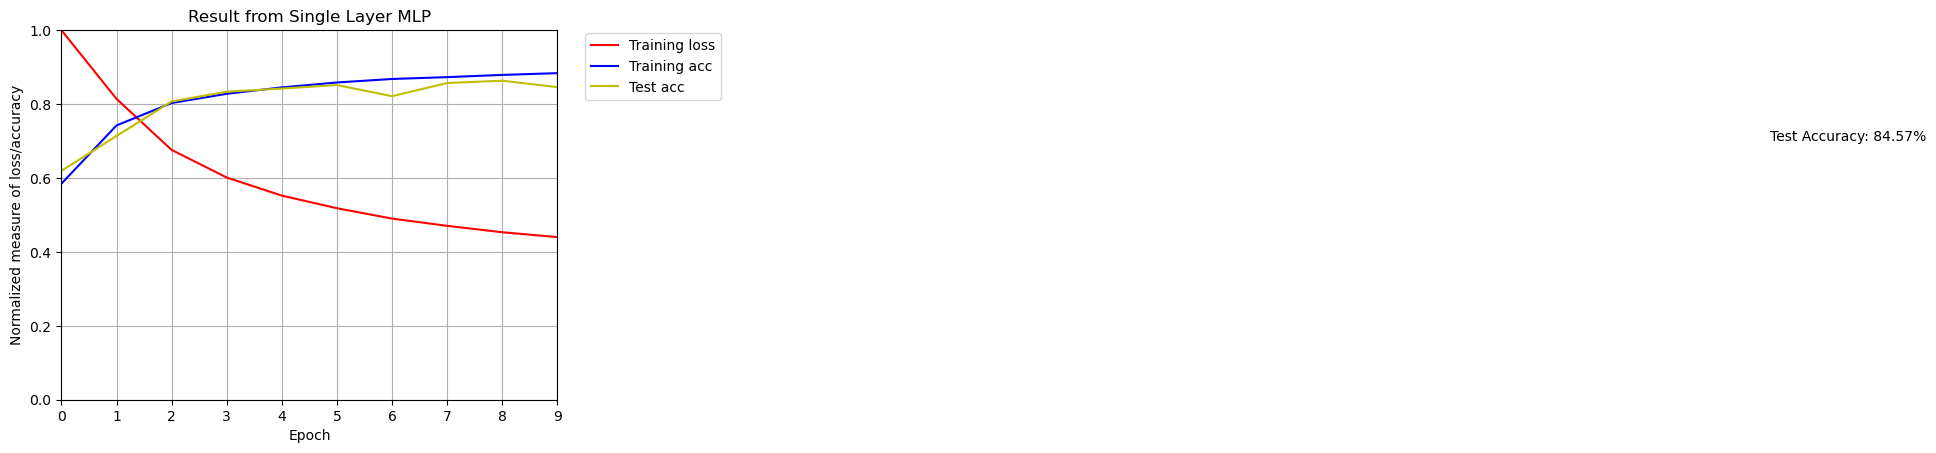

In [35]:
## Plot the loss and accuracy
plt.xlabel("Epoch")
plt.ylabel("Normalized measure of loss/accuracy")
x_len = list(range(len(accuracySLMLP)))

plt.axis([0,max(x_len),0,1])
plt.title("Result from Single Layer MLP")
lossSLMLP = np.asarray(lossSLMLP)/max(lossSLMLP)
plt.plot(x_len, lossSLMLP, 'r', label='Training loss')
plt.plot(x_len, accuracySLMLP, 'b', label='Training acc')
plt.plot(x_len, test_accuracySLMLP, 'y', label='Test acc')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.text(31, 0.7, f"Test Accuracy: {test_accuracySLMLP[-1]*100:.2f}%")
plt.show()
